<a href="https://colab.research.google.com/github/davidbashyr/Spotify-Stream-Analysis/blob/main/SpotifyDataWorkload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Most Streamed Spotify Songs 2024.csv", encoding="latin1")

In [6]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [8]:
pd.set_option('display.max_columns', None)
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [12]:
cols_to_drop = [
    "ISRC",
    "YouTube Playlist Reach",
    "Apple Music Playlist Count",
    "AirPlay Spins",
    "SiriusXM Spins",
    "Deezer Playlist Count",
    "Amazon Playlist Count",
    "Pandora Streams",
    "Pandora Track Stations",
    "TIDAL Popularity"
]
df = df.drop(columns=[col for col in cols_to_drop if col in cols_to_drop])

In [13]:
df.head()

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,Deezer Playlist Reach,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","17,598,718","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","10,422,430","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","36,321,847","7,208,651","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","24,684,248",NaN,"11,822,942",0
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"17,660,624","207,179","457,017",1


In [15]:
df.columns = [col.strip().replace(" ", "_").replace("-", "_").lower() for col in df.columns]

In [16]:
df.head()

,track,album_name,artist,release_date,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,deezer_playlist_reach,soundcloud_streams,shazam_counts,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","17,598,718","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","10,422,430","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","36,321,847","7,208,651","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","24,684,248",NaN,"11,822,942",0
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"17,660,624","207,179","457,017",1


In [17]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [31]:
numeric_cols = [
    'spotify_streams', 'spotify_playlist_count',
    'youtube_views', 'youtube_likes', 'tiktok_likes', 'tiktok_posts'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(",", "")
            .astype(float)
        )

In [27]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
reference_date = pd.Timestamp("2024-12-31")
df['days_since_release'] = (reference_date - df['release_date']).dt.days
df['streams_per_day'] = df['spotify_streams'] / df['days_since_release']

In [28]:
df.head()

,track,album_name,artist,release_date,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,deezer_playlist_reach,soundcloud_streams,shazam_counts,explicit_track,days_since_release,streams_per_day
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,725.4,3.904709e+08,30716.0,"196,631,588",92.0,8.427475e+07,1713126.0,"5,767,700",6.515659e+08,"5,332,281,936","17,598,718","4,818,457","2,669,262",0,249,1.568156e+06
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2,545.9,3.237039e+08,28113.0,"174,597,137",92.0,1.163470e+08,3486739.0,"674,700",3.522355e+07,"208,339,025","10,422,430","6,623,075","1,118,279",1,241,1.343170e+06
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,538.4,6.013093e+08,54331.0,"211,607,669",92.0,1.225991e+08,2228730.0,"3,025,400",2.751542e+08,"3,369,120,610","36,321,847","7,208,651","5,285,340",0,287,2.095154e+06
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,444.9,2.031281e+09,269802.0,"136,569,078",85.0,1.096101e+09,10629796.0,"7,189,811",1.078758e+09,"14,603,725,994","24,684,248","1,336,043","11,822,942",0,719,2.825147e+06
4,Houdini,Houdini,Eminem,2024-05-31,5,423.3,1.070349e+08,7223.0,"151,469,874",88.0,7.737396e+07,3670188.0,"16,400",1.800000e+06,"1,200,000","17,660,624","207,179","457,017",1,214,5.001632e+05


In [32]:
df['yt_like_ratio'] = (df['youtube_likes'] / df['youtube_views']) * 1000
df['tiktok_engagement'] = (df['tiktok_likes'] / df['tiktok_posts'])

In [33]:
df.head()

,track,album_name,artist,release_date,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,deezer_playlist_reach,soundcloud_streams,shazam_counts,explicit_track,days_since_release,streams_per_day,yt_like_ratio,tiktok_engagement
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,725.4,3.904709e+08,30716.0,"196,631,588",92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,"5,332,281,936","17,598,718","4,818,457","2,669,262",0,249,1.568156e+06,20.327867,112.968064
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2,545.9,3.237039e+08,28113.0,"174,597,137",92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,"208,339,025","10,422,430","6,623,075","1,118,279",1,241,1.343170e+06,29.968438,52.206235
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,538.4,6.013093e+08,54331.0,"211,607,669",92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,"3,369,120,610","36,321,847","7,208,651","5,285,340",0,287,2.095154e+06,18.179005,90.948052
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,444.9,2.031281e+09,269802.0,"136,569,078",85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,"14,603,725,994","24,684,248","1,336,043","11,822,942",0,719,2.825147e+06,9.697826,150.039823
4,Houdini,Houdini,Eminem,2024-05-31,5,423.3,1.070349e+08,7223.0,"151,469,874",88.0,7.737396e+07,3670188.0,16400.0,1.800000e+06,"1,200,000","17,660,624","207,179","457,017",1,214,5.001632e+05,47.434410,109.756098


In [37]:
explicit_avg = df.groupby('explicit_track')['spotify_streams'].mean()

In [38]:
print(explicit_avg)

explicit_track
0    4.911300e+08
1    4.519471e+08
Name: spotify_streams, dtype: float64


In [40]:
df['artist_total_streams'] = df.groupby('artist')['spotify_streams'].transform('sum')
df['artist_stream_share'] = df['spotify_streams'] / df['artist_total_streams']

In [43]:
artist_totals = (
    df.groupby('artist', as_index=False)['spotify_streams']
      .sum()
      .rename(columns={'spotify_streams': 'artist_total_streams'})
      .sort_values(by='artist_total_streams', ascending=False)
)

artist_totals.head(10)

,artist,artist_total_streams
517,Drake,4.489561e+10
1728,The Weeknd,3.860412e+10
183,Bad Bunny,3.705483e+10
1690,Taylor Swift,3.447077e+10
1428,Post Malone,2.613747e+10
545,Ed Sheeran,2.401490e+10
129,Ariana Grande,2.346499e+10
1147,MUSIC LAB JPN,2.286669e+10
1355,Olivia Rodrigo,1.972922e+10
576,Eminem,1.887888e+10


In [44]:
df['streams_per_playlist'] = df['spotify_streams'] / df['spotify_playlist_count']

In [46]:
df.head()

,track,album_name,artist,release_date,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,deezer_playlist_reach,soundcloud_streams,shazam_counts,explicit_track,days_since_release,streams_per_day,yt_like_ratio,tiktok_engagement,artist_total_streams,artist_stream_share,streams_per_playlist
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,725.4,3.904709e+08,30716.0,"196,631,588",92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,"5,332,281,936","17,598,718","4,818,457","2,669,262",0,249,1.568156e+06,20.327867,112.968064,4.391918e+08,0.889067,12712.297695
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2,545.9,3.237039e+08,28113.0,"174,597,137",92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,"208,339,025","10,422,430","6,623,075","1,118,279",1,241,1.343170e+06,29.968438,52.206235,1.221141e+10,0.026508,11514.384235
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,538.4,6.013093e+08,54331.0,"211,607,669",92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,"3,369,120,610","36,321,847","7,208,651","5,285,340",0,287,2.095154e+06,18.179005,90.948052,8.213046e+08,0.732139,11067.517311
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,444.9,2.031281e+09,269802.0,"136,569,078",85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,"14,603,725,994","24,684,248","1,336,043","11,822,942",0,719,2.825147e+06,9.697826,150.039823,1.324810e+10,0.153326,7528.782711
4,Houdini,Houdini,Eminem,2024-05-31,5,423.3,1.070349e+08,7223.0,"151,469,874",88.0,7.737396e+07,3670188.0,16400.0,1.800000e+06,"1,200,000","17,660,624","207,179","457,017",1,214,5.001632e+05,47.434410,109.756098,1.887888e+10,0.005670,14818.624117


In [48]:
df['all_time_rank'] = df['all_time_rank'].astype(str).str.replace(",", "").astype(int)
df['explicit_track'] = df['explicit_track'].astype(bool)

In [49]:
df = df[df['spotify_streams'] > 0]

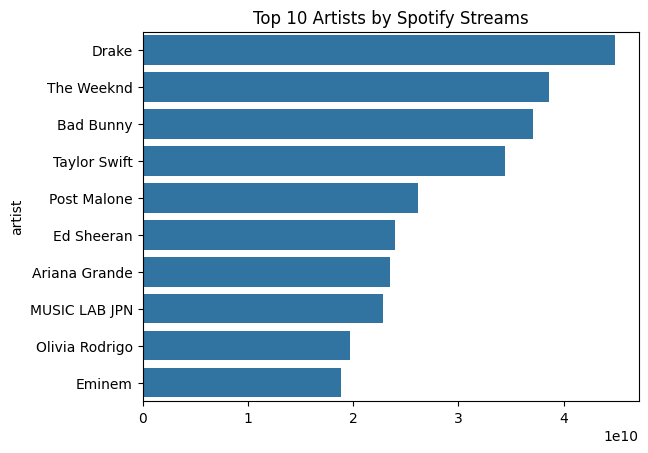

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# TOP 10 artists by streams
top_artists = df.groupby('artist')['spotify_streams'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 Artists by Spotify Streams")
plt.show()

In [52]:
df.to_csv("spotify_cleaned.csv", index=False)
from google.colab import files
files.download("spotify_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>